In [67]:
# Importing Libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

# Importing & Understanding Data

In [68]:
df = pd.read_csv("Iris.csv", sep = ",", encoding = "ISO-8859-1", header = 0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
df.set_index('Id', inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.shape

(150, 5)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [72]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Exploratory Data Analyses

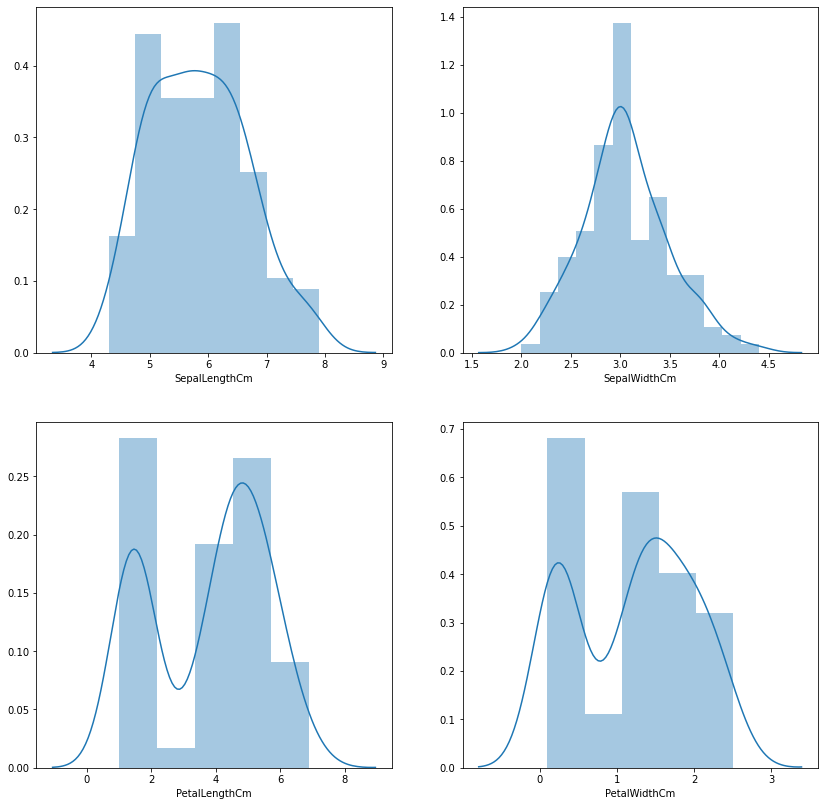

In [76]:
plt.figure(figsize = (14,14))
f = df.columns[:-1]
for i in enumerate(f):
    plt.subplot(2,2, i[0] + 1)
    sns.distplot(df[i[1]])

We could infer as per the distplots, Sepal length and Sepal Width are normally distributed whereas, Petal Length and Petal width are not completely normally distributed and have a pattern, where multiple data clusters could be observed.

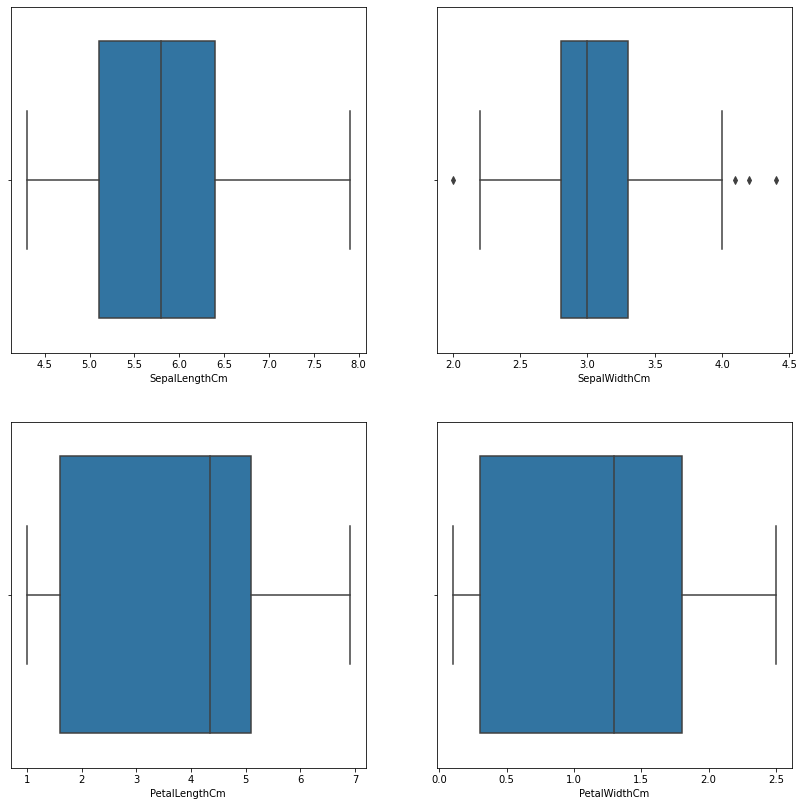

In [77]:
plt.figure(figsize = (14,14))
f = df.columns[:-1]
for i in enumerate(f):
    plt.subplot(2,2, i[0] + 1)
    sns.boxplot(df[i[1]])

In [78]:
# Dealing with outliers for SepalWidthCm column

q1 = df['SepalWidthCm'].quantile(0.025)
df['SepalWidthCm'][df['SepalWidthCm']<=q1] = q1

q2 = df['SepalWidthCm'].quantile(0.975)
df['SepalWidthCm'][df['SepalWidthCm']>=q2] = q2

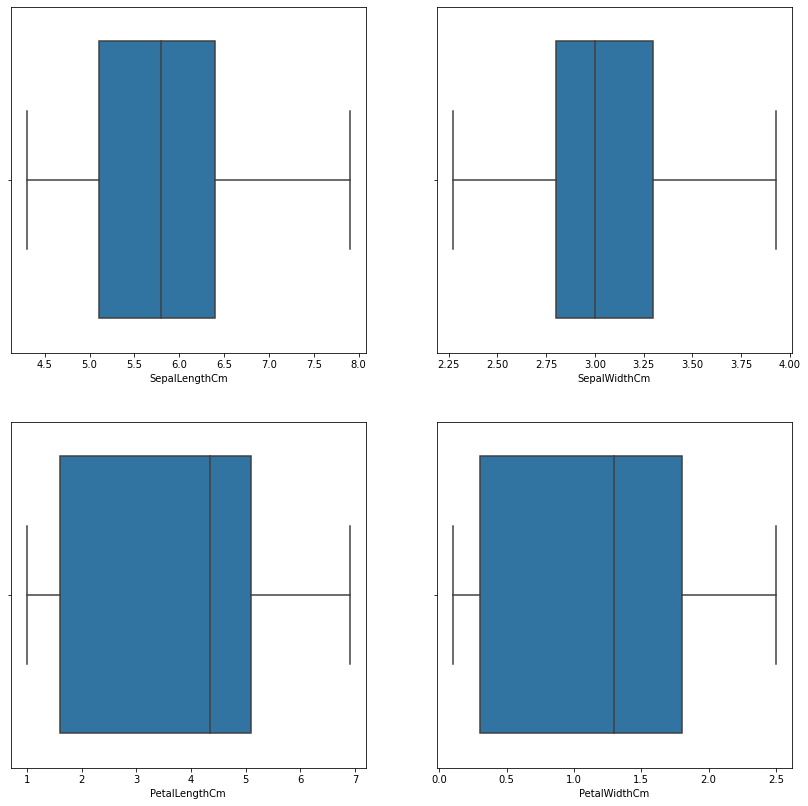

In [79]:
plt.figure(figsize = (14,14))
f = df.columns[:-1]
for i in enumerate(f):
    plt.subplot(2,2, i[0] + 1)
    sns.boxplot(df[i[1]])

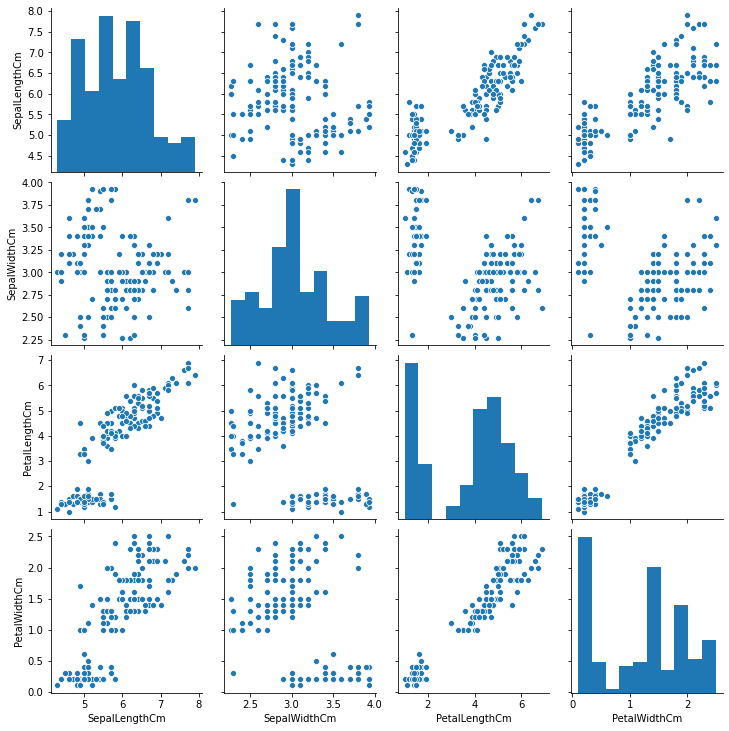

In [80]:
sns.pairplot(df, vars = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

plt.show()

In [81]:
# Hopkins Statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [83]:
hopkins(df.drop(["Species"], axis = 1))

0.8588404801894901

Hopkins score is greater than 80 and indicates that the data is good for clustering.

## Scaling

In [84]:
scaler = StandardScaler()

In [85]:
df_scaled = scaler.fit_transform(df.drop("Species", axis = 1))
df_scaled

array([[-9.00681170e-01,  1.09859626e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.23877324e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.65112112e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.20617394e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.34309098e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  2.07657513e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.54101547e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.54101547e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.68372041e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.20617394e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.58758570e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.54101547e-01, -1.22754100e+00,
      

In [86]:
df_scaled.shape

(150, 4)

In [87]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns[1:]
df_scaled.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.098596,-1.341272,-1.312977
1,-1.143017,-0.123877,-1.341272,-1.312977
2,-1.385353,0.365112,-1.398138,-1.312977
3,-1.506521,0.120617,-1.284407,-1.312977
4,-1.021849,1.343091,-1.341272,-1.312977


# Modelling

In [88]:
range_n_clusters = [2,3,4,5,6,7,8, 9,10,11]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n clusters = 2, the silhouette score is 0.5802525209726856
For n clusters = 3, the silhouette score is 0.46710854930422824
For n clusters = 4, the silhouette score is 0.4035063090377103
For n clusters = 5, the silhouette score is 0.3537077701794304
For n clusters = 6, the silhouette score is 0.3385731654338081
For n clusters = 7, the silhouette score is 0.3332468425373498
For n clusters = 8, the silhouette score is 0.3647443044539347
For n clusters = 9, the silhouette score is 0.36063658198161
For n clusters = 10, the silhouette score is 0.3622589611062942
For n clusters = 11, the silhouette score is 0.3718244144680737


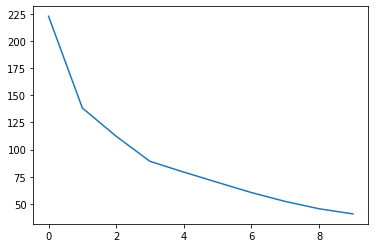

In [89]:
ssd = []

range_n_clusters = [2,3,4,5,6,7,8,9,10,11]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
    
plt.plot(ssd)
plt.show()

Considering decrease in slope from 3 and choosing 2nd highest of Silhouette score, propose to choose cluster count as 3

#### Final model with optimised k = 3

In [90]:
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [91]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [92]:
# Adding label to initial dataframe

df['cluster_id'] = kmeans.labels_

In [93]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [94]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667,1.033333
std,0.828066,0.410377,1.764420,0.763161,0.838796
min,4.300000,2.272500,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,3.927500,6.900000,2.500000,2.000000


In [95]:
df.cluster_id.value_counts()

2    55
0    50
1    45
Name: cluster_id, dtype: int64

We observe that cluster 0 has 50 Species, cluster 1 has 45 Species and cluster 2 has 55 Species

# Cluster Profiling

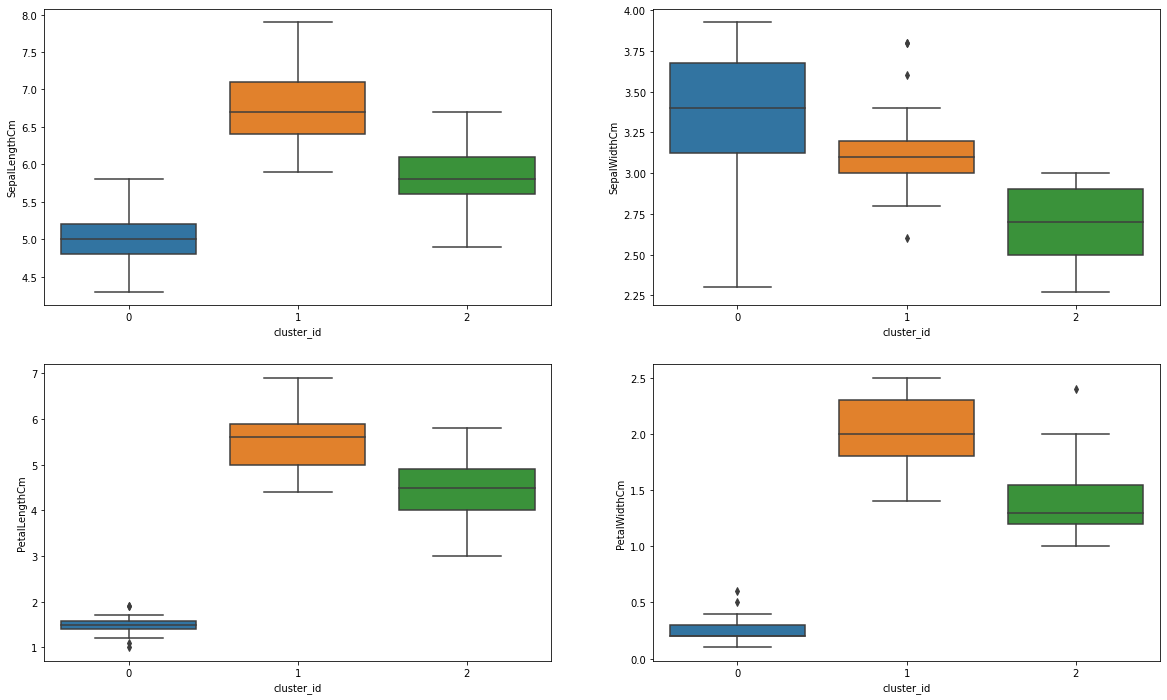

In [96]:
plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.boxplot(x = "cluster_id", y = "SepalLengthCm", data = df)
plt.subplot(2,2,2)
sns.boxplot(x = "cluster_id", y = "SepalWidthCm", data = df)
plt.subplot(2,2,3)
sns.boxplot(x = "cluster_id", y = "PetalLengthCm", data = df)
plt.subplot(2,2,4)
sns.boxplot(x = "cluster_id", y = "PetalWidthCm", data = df)
plt.show()

Following can be observed from above box plots.

1. Cluster 0,on an average, has low sepal length, high sepal width, low petal length and low petal width.
2. Cluster 1, on an average has high sepal length, medium sepal width, high petal length and high petal width.
3. Cluster 2, on an average has medium sepal length, low sepal width, medium petal length and medium petal width.

As per distplots in EDA, we observed multiple data clusters for Petal length and Petal Width. Considering the same, plotting scatter plot for the cluster IDs between Petal length and petal Width.

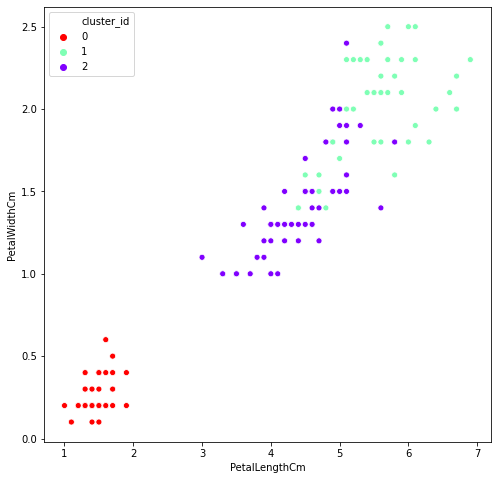

In [112]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = 'cluster_id', data = df, palette = 'rainbow_r')
plt.show()

It can be observed that Cluster 0 has low petal length and petal width, Cluster 1 has high petal length and petal width and Cluster 2 stands in between both.